# Le-Net 1 based architecture

We start with 41X41 (I) after first convolution (9x9)we have 33X33 (L1). The next pooling layer reduces dimension with 3 to an output image of 11X11 with 4x4 pooling kernels (L2). Then we apply different types of convolution 4x4 kernels on the L2 layer resulting in 8x8 (L3) . Then followed by pooling 2X2 resulting in 4x4 output map (L4). So we have 16 connection for each element in layer L4 (which depend on the amount of different Covolutions in L3) 


\begin{equation}
f(x)=\frac{1}{1+e^{-x}} \\
F_{k}= f( \sum_{i} \mathbf{W^{k}_{i} \cdot y_{i}}-b_{k})
\end{equation}


\begin{equation}
E=\sum_{k} \frac{1}{2}|t_k-F_{k}|^{2} \\
\Delta W_{ij}= - \eta \frac{dE}{d W_{ij}}
\end{equation}

\begin{equation}
\Delta W_{ij}= \sum_{k} - \eta \frac{dE}{d F_{k}} \frac{dF_{k}}{dx_{k}} \frac{dx_{k}}{dW_{ij}}=\sum_{k} \eta (t_{k}-F_{k})\frac{e^{-x_{k}}}{(1+e^{-x_{k}})^{2}} \frac{dx_{k}}{dW_{ij}} \\
= \eta (t_{k}-F_{k})\frac{e^{-x_{k}}}{(1+e^{-x_{k}})^{2}} y_{ij}
\end{equation}

\begin{equation}
\Delta b_{k}= - \eta \frac{dE}{d F_{k}} \frac{dF_{k}}{dx_{k}} \frac{dx_{k}}{b_{k}}=\eta (t_{k}-F_{k})\frac{e^{-x_{k}}}{(1+e^{-x_{k}})^{2}} \cdot-1
\end{equation}

Since $\frac{e^{-x_{k}}}{(1+e^{-x_{k}})^{2}}$ is always positive we can neglect this term in our programme

\begin{equation}
x_{k}=\sum_{ij} W^{k}[i,j] \; y^{4rb}[i,j] - b_{k}
\end{equation}

\begin{equation}
y^{4rb}[i,j]= \sum_{u,v} W^{3rb}[u,v] \; y^{3rb} [2i+u,2j+v]
\end{equation}

\begin{equation}
y^{3rb} [2i+u,2j+v]= f\left (x^{3rb}[2i+u,2j+v] \right)
\end{equation}

\begin{equation}
x^{3rb}[2i+u,2j+v]=\sum_{nm} W^{2rb}[n,m] \; y^{2rb}[n+(2i+u),m+(2j+v)] -b^{3rb}[2i+u,2j+v]
\end{equation}

\begin{equation}
\begin{split}
\Delta W^{2rb}[n,m] =\sum_{k} - \eta  \frac{dE}{dF_{k}} 
\frac{dF_{k}}{dx_{k}} 
\sum_{ij} \frac{dx_{k}}{dy^{4rb}[i,j]} 
 \sum_{uv}\frac{dy^{4rb}[i,j]}{d y^{3rb} [2i+u,2j+v]} 
\frac{d y^{3rb} [2i+u,2j+v]}{d x^{3rb}[2i+u,2j+v]}
\sum_{nm}\frac{d x^{3rb}[2i+u,2j+v]}{d W^{2rb}[n,m]}
\end{split}
\end{equation}

\begin{equation}
\begin{split}
\Delta b^{3rb}[2i+u,2j+v] =\sum_{k} - \eta  \frac{dE}{dF_{k}} 
\frac{dF_{k}}{dx_{k}} 
\sum_{ij} \frac{dx_{k}}{dy^{4rb}[i,j]} 
 \sum_{uv}\frac{dy^{4rb}[i,j]}{d y^{3rb} [2i+u,2j+v]} 
\frac{d y^{3rb} [2i+u,2j+v]}{d x^{3rb}[2i+u,2j+v]}
\frac{d x^{3rb}[2i+u,2j+v]}{d b^{3rb}[2i+u,2j+v]}
\end{split}
\end{equation}

\begin{equation}
    \frac{dx_{k}}{dy^{4rb}[i,j]} = W^{4rbk}[i,j]\\
\end{equation}

\begin{equation}
    \frac{dy^{4rb}[i,j]}{d y^{3rb} [2i+u,2j+v]} = W^{3rb}[u,v] \\
 \end{equation}
 

\begin{equation}
\frac{d y^{3rb} [2i+u,2j+v]}{d x^{3rb}[2i+u,2j+v]}=\frac{e^{-x^{3rb}[2i+u,2j+v]}}{(1+e^{-x^{3rb}[2i+u,2j+v]})^2}
\end{equation}
This term is first not included since it is always positive. If the training will not converge it might be possible to include this term

 \begin{equation}
    \frac{d y^{3rb} [2i+u,2j+v]}{d W^{2rb}[n,m]}= y^{2rb} [n+(2i+u),m+(2j+v)] \\
\end{equation}

\begin{equation}
\frac{d x^{3rb}[2i+u,2j+v]}{d b^{3rb}[2i+u,2j+v]}=-1
\end{equation}

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as lin
import scipy.signal as sig
from PIL import Image
import glob
import matplotlib.cm as cm
import itertools

In [2]:
########### Load Input ############################################################################################################################
# In this script I used the brightness to determine structures, instead of one RGB color:
# this is determined by: 0.2126*R + 0.7152*G + 0.0722*B
# Source: https://en.wikipedia.org/wiki/Relative_luminance

patchSize=40 # patchsize this must be 48 since our network can only handle this value

# Open forest
Amount_data= len(glob.glob('Forest/F*'))
Patches_F=np.empty([1,patchSize,patchSize])
Patches_F_RGB=np.empty([1,patchSize,patchSize,3])
Patches_t=np.empty([3])

for k in range (0, Amount_data):
    name="Forest/F%d.png" % (k+1)
    img = Image.open(name)
    data=img.convert('RGB')
    data= np.asarray( data, dtype="int32" )
    data=0.2126*data[:,:,0]+0.7152*data[:,:,1]+0.0722*data[:,:,2]
    data2=img.convert('RGB')
    data2= np.asarray( data2, dtype="int32" )

    Yamount=data.shape[0]/patchSize # Counts how many times the windowsize fits in the picture
    Xamount=data.shape[1]/patchSize # Counts how many times the windowsize fits in the picture
    
    # Create patches for structure
    data_t=np.array([[data[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize] for i in range(0,Xamount)] for j in range(0,Yamount)])
    data_t=np.reshape(data_t, [data_t.shape[0]*data_t.shape[1], patchSize, patchSize])
    Patches_F=np.append(Patches_F,data_t,axis=0)
    #Create patches for colour
    data_t=np.array([[data2[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize,:] for i in range(0,Xamount)] for j in range(0,Yamount)])
    data_t=np.reshape(data_t, [data_t.shape[0]*data_t.shape[1], patchSize, patchSize, 3])
    Patches_F_RGB=np.append(Patches_F_RGB, data_t,axis=0)
Patches_F=np.delete(Patches_F, 0,0)  
Patches_F_RGB=np.delete(Patches_F_RGB, 0,0)   
 
# Open city
Amount_data= len(glob.glob('City/C*'))
Patches_C=np.empty([1,patchSize,patchSize])
Patches_C_RGB=np.empty([1,patchSize,patchSize,3])
Patches_t=np.empty([3])

for k in range (0, Amount_data):
    name="City/C%d.png" % (k+1)
    img = Image.open(name)
    data=img.convert('RGB')
    data = np.asarray( data, dtype="int32" )
    data=0.2126*data[:,:,0]+0.7152*data[:,:,1]+0.0722*data[:,:,2]
    data2=img.convert('RGB')
    data2= np.asarray( data2, dtype="int32" )
    
    Yamount=data.shape[0]/patchSize # Counts how many times the windowsize fits in the picture
    Xamount=data.shape[1]/patchSize # Counts how many times the windowsize fits in the picture
    
    # Create patches for structure
    data_t=np.array([[data[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize] for i in range(0,Xamount)] for j in range(0,Yamount)])
    data_t=np.reshape(data_t, [data_t.shape[0]*data_t.shape[1], patchSize, patchSize])
    Patches_C=np.append(Patches_C,data_t,axis=0)
    #Create patches for colour
    data_t=np.array([[data2[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize,:] for i in range(0,Xamount)] for j in range(0,Yamount)])
    data_t=np.reshape(data_t, [data_t.shape[0]*data_t.shape[1], patchSize, patchSize, 3])
    Patches_C_RGB=np.append(Patches_C_RGB, data_t,axis=0)

Patches_C=np.delete(Patches_C, 0,0)  
Patches_C_RGB=np.delete(Patches_C_RGB, 0,0)   

# Open water
Amount_data= len(glob.glob('Water/W*'))
Patches_W=np.empty([1,patchSize,patchSize])
Patches_W_RGB=np.empty([1,patchSize,patchSize,3])
Patches_t=np.empty([3])

for k in range (0, Amount_data): 
    name="Water/W%d.png" % (k+1)
    img = Image.open(name)
    data=img.convert('RGB')
    data = np.asarray( data, dtype="int32" )
    data=0.2126*data[:,:,0]+0.7152*data[:,:,1]+0.0722*data[:,:,2]   

    data2 = img.convert('RGB')   
    data2 = np.asarray( data2, dtype="int32" )
        
    Yamount=data.shape[0]/patchSize # Counts how many times the windowsize fits in the picture
    Xamount=data.shape[1]/patchSize # Counts how many times the windowsize fits in the picture
    
    # Create patches for structure
    data_t=np.array([[data[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize] for i in range(0,Xamount)] for j in range(0,Yamount)])
    data_t=np.reshape(data_t, [data_t.shape[0]*data_t.shape[1], patchSize, patchSize])
    Patches_W=np.append(Patches_W,data_t,axis=0)
    #Create patches for colour
    data_t=np.array([[data2[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize,:] for i in range(0,Xamount)] for j in range(0,Yamount)])
    data_t=np.reshape(data_t, [data_t.shape[0]*data_t.shape[1], patchSize, patchSize, 3])
    Patches_W_RGB=np.append(Patches_W_RGB, data_t,axis=0)

Patches_W=np.delete(Patches_W, 0,0)  
Patches_W_RGB=np.delete(Patches_W_RGB, 0,0)    

In [3]:
print Patches_C.shape[0], Patches_W.shape[0], Patches_F.shape[0]

5947 4897 7163


In [4]:
########### Functions ############################################################################################################################

# Define Activitation functions, pooling and convolution functions (the rules)

def Sigmoid(x): 
    return (1/(1+np.exp(-x)))

def Sigmoid_dx(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

def TanH(x):
    return (1-np.exp(-x))/(1+np.exp(-x))


def Pool(I,W):
    PoolImg=np.zeros((len(I)/len(W),len(I)/len(W))) # W must fit an integer times into I.
    for i in range(0,len(PoolImg)):
        for j in range(0,len(PoolImg)):
            SelAr=I[i*len(W):(i+1)*len(W),j*len(W):(j+1)*len(W)]
            PoolImg[i,j]=np.inner(SelAr.flatten(),W.flatten()) # Now this is just an inner product since we have vectors
    return PoolImg

# To automatically make Gaussian kernels
def makeGaussian(size, fwhm = 3, center=None):
    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

# To automatically define pooling nodes
def Pool_node(N):
    s=(N,N)
    a=float(N)*float(N)
    return (1.0/a)*np.ones(s) 



In [13]:
#################### Define pooling layers ###########################################################################
P12=Pool_node(4)*(1.0/100.0) #factor 1000 added to lower values more
P34=Pool_node(1)*(1.0/10.0) 

#################### Define Convolution layers #######################################################################

######### First C layer #########
C1=[]

## First Kernel

# Inspiration: http://en.wikipedia.org/wiki/Sobel_operator
# http://stackoverflow.com/questions/9567882/sobel-filter-kernel-of-large-size

Kernel=np.array([[4,3,2,1,0,-1,-2,-3,-4],
                 [5,4,3,2,0,-2,-3,-4,-5], 
                 [6,5,4,3,0,-3,-4,-5,-6],
                 [7,6,5,4,0,-4,-5,-6,-7], 
                 [8,7,6,5,0,-5,-6,-7,-8],
                 [7,6,5,4,0,-4,-5,-6,-7],
                 [6,5,4,3,0,-3,-4,-5,-6],
                 [5,4,3,2,0,-2,-3,-4,-5],
                 [4,3,2,1,0,-1,-2,-3,-4]])

C1.append(Kernel)

## Second Kernel
Kernel=np.matrix.transpose(Kernel)
C1.append(Kernel)

##Third Kernel
#Kernel=makeGaussian(9,5)
#Kernel=(1/np.sum(Kernel))*Kernel
#C1.append(Kernel)

######### Initialize output weights and biases #########

# Define the number of branches in one row
N_branches= 3
ClassAmount=3 # Forest, City, Water
Size_C2=5
S_H3=((patchSize-C1[0].shape[0]+1)/P12.shape[1])-Size_C2+1
S_H4=S_H3/P34.shape[1]

C2=np.random.rand(len(C1),N_branches, Size_C2, Size_C2) # second convolution weigths   
W=np.random.rand(ClassAmount, len(C1), N_branches, S_H3, S_H3) # end-weight from output to classifier-neurons
W2=np.random.rand(3,3)
H3_bias=np.random.rand(len(C1),N_branches) # bias in activation function from C2 to H3
Output_bias=np.random.rand(ClassAmount) # bias on the three classes


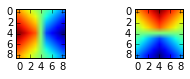

In [14]:
N_plts=len(C1)
for i in range(0,N_plts):
    plt.subplot(4,3,i+1)
    plt.imshow(C1[i])    

# For the extra information regarding the code in the following cell

a random patch is chosen in the following way: the program counts how many files and patches there are in total, then it permutes the sequence so that a random patch is chosen every iteration (forest, city, water). After selecting the number the file has to be found back. 

In [15]:
N_F=Patches_F.shape[0]
N_C=Patches_C.shape[0]
N_W=Patches_W.shape[0]

N_total=N_F+N_C+N_W
Sequence = np.arange(N_total)
Sequence = np.random.permutation(Sequence)

In [16]:
# TRAINING PHASE
#delta_H4=np.zeros((len(C1), N_branches, S_H4, S_H4))
#delta_H3=np.zeros((len(C1), N_branches, S_H4, S_H4))

n_bias=1*10**-3
n_W=0.5
n_C2=1*10**-2
n_H3_bias=1*10**-2

FF=[]

Sample_iterations=0
N_1000=0

from itertools import product
###### Chooses patch and defines label #####
#for PP in range(0,len(Sequence)):
for PP in range(0,14000):
    SS=Sequence[PP]
    #SS=14000
    if SS<N_F:
        Class_label=np.array([1,0,0])
        inputPatch=Patches_F[SS]
        Int_RGB=np.mean(np.mean(Patches_F_RGB[SS,:,:,:], axis=0), axis=0)/255
        
    elif(SS>=N_F) and (SS<(N_F+N_C)):
        Class_label=np.array([0,1,0])
        inputPatch=Patches_C[SS-N_F]
        Int_RGB=np.mean(np.mean(Patches_C_RGB[SS-N_F,:,:,:], axis=0), axis=0)/255
               
    else:
        Class_label=np.array([0,0,1])
        inputPatch=Patches_W[SS-N_F-N_C]  
        Int_RGB=np.mean(np.mean(Patches_W_RGB[SS-N_F-N_C,:,:,:], axis=0), axis=0)/255

    ### Layer 1 ###
    H1=[]
    H2=[]
    H3=np.zeros((len(C1), N_branches, S_H3,S_H3))
    H4=np.zeros((len(C1), N_branches, S_H4,S_H4))
    x=np.zeros(ClassAmount)
    f=np.zeros(ClassAmount)
    
    II=1
    ITER=0
    while II==1: 
        
        for r in range (0, len(C1)):
            H1.append(sig.convolve(inputPatch, C1[r], 'valid'))
            H2.append(Pool(H1[r], P12))
        #From here on BP trakes place!
            for b in range(0,N_branches):
                H3[r][b]=Sigmoid(sig.convolve(H2[r], C2[r][b],'valid')-H3_bias[r][b])
                H4[r][b]=Pool(H3[r][b],P34)       
    #Now we have 3x3x4x4 inputs, connected to the 3 output nodes 
        y=np.append([H4.flatten()], [Int_RGB])
        for k in range(0,ClassAmount):
            W_t=np.append([W[k].flatten()], [W2[k]])
            x[k]=np.inner(y, W_t)          
            f[k]=Sigmoid(x[k]-Output_bias[k])
        f=f/np.sum((f))

            ###### Back-propagation #####
            # First learning the delta's
        e_k=f-Class_label
        delta_k=e_k*Sigmoid_dx(x)
        #Output_bias=Output_bias[k]+n_bias*e_k
        for k in range(0, ClassAmount):
            #update weights output layer
            W[k]=W[k]-n_W*delta_k[k]*H4
            W2[k]=W2[k]-n_W*delta_k[k]*Int_RGB
            #determine delta in Sub-sampling layer that is not trained
            #delta_H4=delta_H4+delta_k[k]*W[k]
            #for b in range(0,N_branches):
            #for r in range(0,len(C1):
            #delta_H3=
        
        #print f
        FF.append(f)
        ERROR=np.sum((Class_label-f)**2)
        ITER=ITER+1
        
        if ERROR<0.55 or ITER>4:
            II=0  
    print f, np.argmax(Class_label)
    if np.argmax(f)==np.argmax(Class_label):
        print True
    else:
        print False  
    
    Sample_iterations=Sample_iterations+1
    if (Sample_iterations-(1000*N_1000))==1000:
        N_1000=N_1000+1
        n_W=0.6*n_W    

[ 0.33471669  0.33380175  0.33148156] 1
False
[ 0.3300677   0.34179508  0.32813722] 0
False
[ 0.33388364  0.33801374  0.32810261] 1
True
[ 0.33297576  0.33585138  0.33117286] 2
False
[ 0.33287729  0.33419064  0.33293207] 1
True
[ 0.34404813  0.33301116  0.32294071] 0
True
[ 0.33097452  0.34023997  0.32878552] 0
False
[ 0.33466288  0.33540205  0.32993506] 1
True
[ 0.32490737  0.3485234   0.32656924] 1
True
[ 0.33383403  0.33698214  0.32918383] 0
False
[ 0.33174465  0.34511286  0.32314248] 1
True
[ 0.33593377  0.33380411  0.33026212] 0
True
[ 0.29498928  0.38835897  0.31665174] 1
True
[ 0.33268274  0.3447129   0.32260436] 0
False
[ 0.33092382  0.3494557   0.31962048] 0
False
[ 0.33713978  0.33599814  0.32686209] 2
False
[ 0.34115267  0.3503095   0.30853783] 1
True
[ 0.3235999  0.3566846  0.3197155] 1
True
[ 0.33445784  0.33531083  0.33023132] 1
True
[ 0.30415195  0.37138461  0.32446344] 2
False
[ 0.33768294  0.34387838  0.31843868] 0
False
[ 0.33538221  0.33497501  0.32964279] 2
False
[ 

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: overflow encountered in exp


In [112]:
x

array([ 3.72216494,  3.5020869 ,  3.68895499])

In [13]:
N_total

18007

In [17]:
####### Test phase #######
Error_Test=[]
N_correct=0


from itertools import product
###### Chooses patch and defines label #####
#for PP in range(0,len(Sequence)):
for PP in range(14000,15000):
    SS=Sequence[PP]
    if SS<N_F:
        Class_label=np.array([1,0,0])
        inputPatch=Patches_F[SS]
        Int_RGB=np.mean(np.mean(Patches_F_RGB[SS,:,:,:], axis=0), axis=0)/255
        
    elif(SS>=N_F) and (SS<(N_F+N_C)):
        Class_label=np.array([0,1,0])
        inputPatch=Patches_C[SS-N_F]
        Int_RGB=np.mean(np.mean(Patches_C_RGB[SS-N_F,:,:,:], axis=0), axis=0)/255
               
    else:
        Class_label=np.array([0,0,1])
        inputPatch=Patches_W[SS-N_F-N_C]  
        Int_RGB=np.mean(np.mean(Patches_W_RGB[SS-N_F-N_C,:,:,:], axis=0), axis=0)/255

    ### Layer 1 ###
    H1=[]
    H2=[]
    H3=np.zeros((len(C1), N_branches, S_H3,S_H3))
    #H4=np.zeros((len(C1), N_branches, S_H4,S_H4))
    x=np.zeros(ClassAmount)
    f=np.zeros(ClassAmount)
    for r in range (0, len(C1)):
        H1.append(sig.convolve(inputPatch, C1[r], 'valid'))
        H2.append(Pool(H1[r], P12))
        for b in range(0,N_branches):
            H3[r][b]=Sigmoid(sig.convolve(H2[r], C2[r][b],'valid')-H3_bias[r][b])
            H4[r][b]=Pool(H3[r][b],P34) 
    y=np.append([H4.flatten()], [Int_RGB])
    #Now we have 3x3x4x4 inputs, connected to the 3 output nodes 
    for k in range(0,ClassAmount):
        W_t=np.append([W[k].flatten()], [W2[k]])
        x[k]=np.inner(y, W_t)          
        f[k]=Sigmoid(x[k]-Output_bias[k])
    f=f/np.sum((f))
    Error_Test.append(np.sum((Class_label-f)**2)) 
    if np.argmax(f)==np.argmax(Class_label):
        print True
        N_correct=N_correct+1
    else:
        print False 

Perc_corr=float(N_correct)/1000
print Perc_corr
        
        


True
True
False
True
True
True
True
True
True
True
False
False
False
True
True
False
False
False
True
False
False
False
False
True
True
True
True
True
True
False
True
False
False
True
True
True
True
True
True
False
True
False
True
False
True
True
True
False
False
True
False
True
False
True
True
False
True
True
True
True
True
True
False
True
False
True
False
False
True
False
True
False
True
True
True
False
False
True
False
True
False
True
True
False
True
False
True
False
True
True
False
True
True
True
True
True
False
False
True
False
True
True
True
True
True
False
True
True
True
False
True
True
False
False
True
True
True
False
True
True
True
True
False
True
True
True
True
False
True
True
False
True
False
True
True
False
False
True
False
False
True
True
False
True
False
True
False
True
False
False
True
False
True
False
True
False
True
True
True
True
True
True
False
True
False
False
False
True
True
True
True
True
False
True
True
True
True
False
True
True
True
False
True
False
False
True
T

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: overflow encountered in exp


In [18]:
float(N_correct)/1000


0.645

# save training parameters

In [186]:
import pickle

# obj0, obj1, obj2 are created here...

# Saving the objects:
#with open('objs.pickle', 'w') as f:
#    pickle.dump([obj0, obj1, obj2], f)

# Getting back the objects:
#with open('objs.pickle') as f:
#    obj0, obj1, obj2 = pickle.load(f)
    
with open('W.pickle', 'w') as f:
    pickle.dump(W,f)
with open("W2.txt", 'w') as f:
    f.write(str(W2))
with open("Output_bias.txt", 'w') as f:
    f.write(str(Output_bias))
with open("H3_bias.txt", 'w') as f:
    f.write(str(H3_bias))
with open("C2.txt", 'w') as f:
    f.write(str(C2))


In [181]:
####### Test phase on new images #######
Error_Test=[]
N_correct=0
patchSize=40 

Patches_TEST=np.empty([1,patchSize,patchSize])
Patches_TEST_RGB=np.empty([1,patchSize,patchSize,3])
Patches_t=np.empty([3])

name="Test/Test4.png"
img = Image.open(name)
data=img.convert('RGB')
data= np.asarray( data, dtype="int32" )
data=0.2126*data[:,:,0]+0.7152*data[:,:,1]+0.0722*data[:,:,2]
data2=img.convert('RGB')
data2= np.asarray( data2, dtype="int32" )

Yamount=data.shape[0]/patchSize # Counts how many times the windowsize fits in the picture
Xamount=data.shape[1]/patchSize # Counts how many times the windowsize fits in the picture
    
    # Create patches for structure
data_t=np.array([[data[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize] for i in range(0,Xamount)] for j in range(0,Yamount)])
data_t=np.reshape(data_t, [data_t.shape[0]*data_t.shape[1], patchSize, patchSize])
Patches_TEST=np.append(Patches_TEST,data_t,axis=0)
    #Create patches for colour
data_t=np.array([[data2[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize,:] for i in range(0,Xamount)] for j in range(0,Yamount)])
data_t=np.reshape(data_t, [data_t.shape[0]*data_t.shape[1], patchSize, patchSize, 3])
Patches_TEST_RGB=np.append(Patches_TEST_RGB, data_t,axis=0)
Patches_TEST=np.delete(Patches_TEST, 0,0)  
Patches_TEST_RGB=np.delete(Patches_TEST_RGB, 0,0) 

from itertools import product
###### Chooses patch and defines label #####
#for PP in range(0,len(Sequence)):
Forest=0
City=0
Water=0

for PP in range(0,Patches_TEST.shape[0]):
    inputPatch=Patches_TEST[PP]
    Int_RGB=np.mean(np.mean(Patches_TEST_RGB[PP,:,:,:], axis=0), axis=0)/255
    ### Layer 1 ###
    H1=[]
    H2=[]
    H3=np.zeros((len(C1), N_branches, S_H3,S_H3))
    #H4=np.zeros((len(C1), N_branches, S_H4,S_H4))
    x=np.zeros(ClassAmount)
    f=np.zeros(ClassAmount)
    for r in range (0, len(C1)):
        H1.append(sig.convolve(inputPatch, C1[r], 'valid'))
        H2.append(Pool(H1[r], P12))
        for b in range(0,N_branches):
            H3[r][b]=Sigmoid(sig.convolve(H2[r], C2[r][b],'valid')-H3_bias[r][b])
            H4[r][b]=Pool(H3[r][b],P34) 
    y=np.append([H4.flatten()], [Int_RGB])
    #Now we have 3x3x4x4 inputs, connected to the 3 output nodes 
    for k in range(0,ClassAmount):
        W_t=np.append([W[k].flatten()], [W2[k]])
        x[k]=np.inner(y, W_t)          
        f[k]=Sigmoid(x[k]-Output_bias[k])
    f=f/np.sum((f))
    if np.argmax(f)==0:
        Forest=Forest+1
    if np.argmax(f)==1:
        City=City+1
    if np.argmax(f)==2:
        Water=Water+1

    
        

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: overflow encountered in exp


In [182]:
print Forest, City, Water

321 104 4


In [19]:
import pickle
file=open('W.txt','w')
pickle.dump(W,file)
file.close()

file=open('W2.txt','w')
pickle.dump(W2,file)
file.close()

file=open('Output_bias.txt','w')
pickle.dump(Output_bias,file)
file.close()

file=open('H3_bias.txt','w')
pickle.dump(H3_bias,file)
file.close()

file=open('C2.txt','w')
pickle.dump(C2,file)
file.close()